In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

"""
Data description

• tourney_id - tournament_id

• tourney_name - tournament_name

• surface - surface in which the match is played

• draw_size - the size of the draw

• tourney_level - tournament level

'G' = Grand Slams

'M' = Masters 1000s

'A' = other tour-level events

'C' = Challengers

'S' = Satellites/ITFs

'F' = Tour finals and other season-ending events

'D' = Davis Cup

• tourney_date - starting date of the tournament

• match num - match number in a certain tournament

• id - player id

• seed - the seed of the player in that tournament

• entry - How did the player enter the tournaments?

WC - Wildcard

Q - Qualifier

LL - Lucky loser

PR - Protected ranking

SE - Special Exempt

ALT - Alternate player

• name - player name

• hand - hand of the player, right or left

• ht - the height of the player

• IOC - the country of origin

• age - age of the player

• score - final score in the match

• best_of - the maximum number of sets played

• round - the round in the tournament a match belongs to

• minutes - duration of the match in minutes

• ace - number of aces in the match
• df - double faults

• svpt - serve percent

• 1stin - first serve in percent

• 1stWon - first serve winning percent

• 2ndWon - second serve winning percent

• SvGms - number of games played on serve (So, the maximum difference between w_SvGms and l_SvGms will be 1)

• bpSaved - breakpoints saved

• bpFaced - breakpoints faced
"""

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

 ### Abstract
 ##### La ciencia de datos juega un papel preponderante y en crecimiento en cuanto al análisis y predicciones de los resultados de los eventos deportivos. Estos se usa principalmente en el fútbol europeo donde casi todos los equipos y selecciones del continente, tienen departamentos de datos dedicados a identificar jugadores, estudiar lesiones y el reclutamiento de nuevos talentos. 
 
 ##### También, se ve mucha aplicación en el básquet y béisbol en EE.UU. por lo mismos motivos. En el mundo de tenis, los datos están presentes como algo descriptivo del juego y que, hace años, está presente en las transmiciones de TV como en las páginas web del circuito profesional. Actualmente, la data de los partidos se usa mucho para las casas de apuestas para determinar las probabilidades del ganador del partido. No se usa mucho para el desarrollo del club o equipo como se usa en el fútbol, todavía es algo "verde". 
 
 ##### En nuestro caso, busco hacer una análisis completo de cada perfil de jugador y entender cuáles son los mejores match-ups y que probabilidades tienen de ganar. Lo que se muestra a continuación, es algo experimental y no es definitivo.
 
 ##### Esto va dirijido a aquellas personas que jueguen, gusten y quieran hacer estudios sobre los mejores jugadores del tenis. Se busca usarlos de manera profesional como una herramienta de analisis para planear posibles enfrentamientos.

In [4]:
df = pd.read_csv('atp_matches_2004_2022_w_l.csv')

In [5]:
df.sample(10)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
18406,153227,2010-311,Queen's Club,Grass,56,A,20100607,18,103857,0,0,Igor Kunitsyn,R,180,RUS,28,105011,0,0,Illya Marchenko,R,185,UKR,22,1-6 6-4 6-3,3,R64,119,1,0,93,65,40,15,13,7,10,9,0,78,52,41,8,13,2,5,105,491,79,627
46877,183849,2021-0807,Acapulco,Hard,32,A,20210315,296,207518,0,Q,Lorenzo Musetti,R,185,ITA,19,105777,5,0,Grigor Dimitrov,R,188,BUL,29,6-4 7-6(3),3,QF,128,1,2,74,44,34,12,11,2,4,0,6,95,59,37,15,11,11,14,120,630,16,2620
2308,134750,2004-540,Wimbledon,Grass,128,G,20040621,116,103206,10,0,Sebastien Grosjean,R,175,FRA,26,104068,27,0,Robby Ginepri,R,183,USA,21,6-2 6-2 7-6(4),5,R16,122,14,1,98,63,43,21,14,6,8,4,2,112,74,45,16,14,6,12,13,1665,34,865
35430,172087,2016-6967,Shenzhen,Hard,32,A,20160926,277,104926,7,0,Fabio Fognini,R,178,ITA,29,104534,0,0,Dudi Sela,R,175,ISR,31,6-4 6-1,3,R32,77,3,1,57,32,21,14,8,6,8,2,1,62,30,16,14,9,5,11,43,1020,69,746
46674,183645,2021-0496,Marseille,Hard,32,A,20210308,275,104542,0,0,Jo-Wilfried Tsonga,R,188,FRA,35,103852,0,0,Feliciano Lopez,L,188,ESP,39,3-6 6-4 7-5,3,R32,127,19,5,108,57,43,27,16,7,9,13,2,77,48,40,17,15,2,4,66,1015,61,1078
30214,166523,2014-352,Paris Masters,Hard,48,M,20141027,38,104731,14,0,Kevin Anderson,R,203,RSA,28,104527,3,0,Stan Wawrinka,R,183,SUI,29,6-7(2) 7-5 7-6(3),3,R16,170,18,3,125,84,63,23,18,4,5,8,3,114,59,48,31,18,6,8,18,1945,4,5385
34897,171550,2016-0421,Canada Masters,Hard,64,M,20160725,242,106071,12,0,Bernard Tomic,R,193,AUS,23,105292,0,Q,Alejandro Gonzalez,R,190,COL,27,6-4 7-6(1),3,R64,90,7,3,62,36,27,11,11,0,3,4,1,77,43,23,16,11,5,9,22,1645,163,342
10925,144489,2007-540,Wimbledon,Grass,128,G,20070625,75,103908,0,0,Paul Henri Mathieu,R,185,FRA,25,103970,17,0,David Ferrer,R,175,ESP,25,6-3 6-4 6-3,5,R64,117,6,1,80,51,42,14,14,4,5,1,0,100,76,44,11,14,5,10,39,825,15,1725
24306,159882,2012-96,London Olympics,Grass,64,A,20120725,55,104542,5,0,Jo-Wilfried Tsonga,R,188,FRA,27,103852,0,0,Feliciano Lopez,L,188,ESP,30,7-6(5) 6-4,3,R16,69,13,2,57,39,37,13,11,0,0,17,4,67,45,37,11,11,2,3,6,5230,30,1275
21729,156974,2011-422,Cincinnati Masters,Hard,56,M,20110814,45,104468,10,0,Gilles Simon,R,183,FRA,26,103970,5,0,David Ferrer,R,175,ESP,29,6-4 6-7(3) 6-4,3,R16,188,7,2,103,66,47,19,16,5,7,5,3,123,70,48,25,16,10,14,12,2155,6,4200


In [6]:
df_feature = df.drop(['Unnamed: 0','tourney_id','tourney_name', 'draw_size','tourney_date','tourney_level','match_num','winner_id','winner_seed','winner_entry','winner_ht','winner_ioc','winner_hand','winner_age','winner_rank','winner_rank_points','loser_id','loser_seed','loser_entry','loser_ht','loser_ioc','loser_hand','loser_age','loser_rank','loser_rank_points','minutes'], axis=1)

In [7]:
df_feature.sample(10)

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
37003,Clay,Hyeon Chung,Gael Monfils,6-2 6-4,3,R16,2,1,59,43,34,8,9,3,3,4,3,59,39,26,7,9,6,9
27596,Hard,Nicolas Almagro,Fabio Fognini,7-6(6) 6-2,3,QF,9,3,66,29,21,22,10,4,6,1,2,62,39,25,8,10,1,5
7067,Clay,Paul Henri Mathieu,Juan Carlos Ferrero,6-1 6-3,3,R64,5,3,50,32,29,8,8,2,2,1,1,47,40,20,3,8,2,6
17465,Clay,Carlos Moya,Filippo Volandri,6-2 7-5,3,R32,2,2,75,50,34,13,10,5,6,0,1,64,53,29,6,10,3,7
8325,Carpet,Mario Ancic,Max Mirnyi,6-4 7-5,3,QF,3,1,68,43,33,17,11,2,2,2,1,55,31,23,15,11,1,3
19584,Hard,Robin Soderling,Daniel Gimeno Traver,6-2 6-3,3,R16,5,1,45,26,24,13,9,2,2,7,2,50,23,16,12,8,1,4
42023,Clay,Felix Auger Aliassime,Fabio Fognini,6-2 6-3,3,R32,2,1,64,37,28,15,9,5,5,1,2,57,35,21,10,8,2,5
25413,Hard,Julien Benneteau,Victor Hanescu,6-1 6-3,3,R16,5,1,50,33,27,10,8,0,0,2,0,53,35,18,9,8,6,10
39518,Hard,Juan Martin del Potro,Kei Nishikori,6-2 6-2,3,R32,6,1,43,30,23,10,8,1,1,2,1,58,36,20,10,8,9,13
23792,Grass,David Nalbandian,Ruben Bemelmans,6-4 6-2,3,R32,2,4,55,31,23,14,9,2,3,5,1,51,38,22,5,9,3,7


#### Eliminamos columnas innecesarias para el análisis.

In [8]:
df = df.drop(['Unnamed: 0','tourney_id','tourney_name', 'draw_size','tourney_date','tourney_level','match_num','winner_id','winner_seed','winner_entry','winner_ht','winner_ioc','winner_hand','winner_age','winner_rank','winner_rank_points','loser_id','loser_seed','loser_entry','loser_ht','loser_ioc','loser_hand','loser_age','loser_rank','loser_rank_points','minutes'], axis=1)

In [9]:
df.sample(10)

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
39108,Clay,Leonardo Mayer,Fabio Fognini,6-3 6-3,3,R16,4,0,50,32,26,10,9,2,3,2,2,57,38,22,9,9,2,6
30100,Hard,Sergiy Stakhovsky,Miloslav Mecir Jr,6-2 4-6 6-3,3,R32,7,1,82,46,37,21,14,3,4,6,6,83,51,38,14,13,3,6
39268,Hard,Dominic Thiem,Cameron Norrie,6-3 5-7 7-5,3,R32,8,3,91,44,37,28,17,1,3,4,4,113,68,46,24,16,8,11
40990,Hard,Milos Raonic,Stan Wawrinka,7-6(6) 6-4 6-3,5,R32,14,4,88,53,46,21,15,1,1,6,1,95,60,43,22,17,2,5
19465,Hard,Ivan Dodig,Tobias Kamke,6-1 6-1,3,R16,3,3,47,23,19,15,7,2,2,0,1,35,24,10,3,7,0,5
3351,Clay,Igor Andreev,Andreas Seppi,6-2 6-4,3,SF,6,0,43,32,26,7,9,1,2,1,3,59,31,20,13,9,3,7
26750,Clay,Florian Mayer,Nikolay Davydenko,6-1 6-3,3,R64,3,0,45,31,24,9,8,0,0,0,2,48,26,16,7,8,2,6
44660,Hard,Yoshihito Nishioka,Brandon Nakashima,3-6 7-6(5) 6-4,3,QF,4,2,97,62,40,24,15,4,7,12,4,129,84,57,21,16,9,12
6531,Hard,Novak Djokovic,Daniele Bracciali,6-0 6-3,3,R16,8,1,49,32,25,10,8,2,2,4,6,46,21,14,8,7,4,8
38765,Hard,Paolo Lorenzi,Jordan Thompson,7-6(5) 6-4,3,R32,15,4,85,58,46,9,11,4,6,6,3,67,40,27,15,11,3,6


#### Creamos un nuevo dataset para el estudio

In [10]:
df.to_csv('atp_matches_2004_2022_feature.csv', index=False)

## Análisis.

#### Para este trabajo preeliminar, se eligen dos tenistas activos para hacer su comparación: Daniil Medvedev y Stefanos Tsitsipas. 

#### Se usará scatter plots para ver la concetración de los primeros servicios. Luego se usará barra para ver en que superficies tienen mayor margen de victorias. Por último, histogramas con kde para ver la concentación de aces, doble faltas y break points. Todos estos análisis se hacen en compraración con sus rivales en general. Más adelante, se hará en particular.

In [11]:
df_1_winner = df[df['winner_name'] == 'Daniil Medvedev']
df_1_winner['target'] = 1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\35264897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_winner['target'] = 1


In [12]:
df_1_winner.shape

(261, 25)

In [13]:
df_1_loser = df[df['loser_name'] == 'Daniil Medvedev']
df_1_loser['target'] = 0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\1872844159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_loser['target'] = 0


In [14]:
df_1_loser.shape

(116, 25)

In [15]:
df_2_winner = df[df['winner_name'] == 'Stefanos Tsitsipas']
df_2_winner['target'] = 1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\1962632090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_winner['target'] = 1


In [16]:
df_2_winner.shape

(240, 25)

In [17]:
df_2_loser = df[df['loser_name'] == 'Stefanos Tsitsipas']
df_2_loser['target'] = 0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\3091877728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_loser['target'] = 0


In [18]:
df_2_loser.shape

(117, 25)

In [19]:
df_1_winner.sample(10)

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
43460,Hard,Daniil Medvedev,Benoit Paire,7-6(2) 6-1,3,R32,5,2,51,29,22,17,9,0,1,6,4,75,38,28,14,10,5,9,1
43444,Hard,Daniil Medvedev,Andrey Rublev,6-2 6-3,3,QF,9,2,51,28,21,13,9,0,1,4,2,47,26,17,6,8,3,7,1
45430,Hard,Daniil Medvedev,Diego Schwartzman,6-3 6-1,3,QF,8,2,37,28,27,5,8,0,0,0,0,52,35,18,8,8,2,6,1
38763,Hard,Daniil Medvedev,Philipp Kohlschreiber,6-2 6-3,3,R32,8,1,55,36,33,8,9,3,3,1,1,56,33,17,13,8,2,5,1
42436,Clay,Daniil Medvedev,Albert Ramos,6-3 2-6 6-1,3,R32,5,3,72,45,30,13,12,3,6,1,1,68,45,26,13,12,1,6,1
35602,Hard,Daniil Medvedev,Mikhail Kukushkin,6-4 4-0 RET,3,R32,8,1,42,32,25,3,7,2,3,0,2,48,19,9,13,7,6,10,1
50428,Hard,Daniil Medvedev,Yibing Wu,6-4 6-2 6-2,5,R32,12,5,92,59,42,18,13,8,9,1,0,88,56,29,16,13,6,12,1
45915,Hard,Daniil Medvedev,Ilya Ivashka,7-5 6-4,3,R32,3,5,62,39,29,12,11,1,3,3,1,62,41,25,11,11,4,8,1
40855,Hard,Daniil Medvedev,Mirza Basic,6-4 6-4,3,R64,8,7,60,27,19,17,10,5,8,4,8,67,33,23,11,10,5,10,1
45006,Hard,Daniil Medvedev,Frances Tiafoe,6-4 6-1 6-0,5,R16,7,1,60,31,22,20,11,0,1,1,1,70,44,24,6,12,3,11,1


In [20]:
df_1_loser.sample(10)

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
36169,Hard,Jo-Wilfried Tsonga,Daniil Medvedev,6-2 7-5,3,QF,7,0,48,27,26,14,10,0,0,1,3,58,36,23,12,10,1,4,0
50929,Hard,Stefanos Tsitsipas,Daniil Medvedev,6-3 6-7(11) 7-6(1),3,RR,9,1,103,77,64,14,17,0,1,16,2,101,67,57,16,16,1,3,0
43665,Hard,Rafael Nadal,Daniil Medvedev,7-5 6-3 5-7 4-6 6-4,5,F,5,5,159,93,72,34,27,10,15,14,4,182,117,76,35,26,15,21,0
46922,Clay,Cristian Garin,Daniil Medvedev,6-4 6-7(2) 6-1,3,R16,6,1,94,53,40,27,15,1,1,4,4,103,66,47,17,14,6,9,0
38388,Hard,Lucas Pouille,Daniil Medvedev,6-4 6-2,3,R64,5,0,59,42,29,8,9,1,2,6,1,51,32,21,9,9,3,7,0
37936,Hard,Fabio Fognini,Daniil Medvedev,7-6(5) 6-4,3,R64,4,8,80,43,27,20,11,2,5,7,6,90,44,25,22,11,16,20,0
50493,Hard,Stan Wawrinka,Daniil Medvedev,6-4 6-7(7) 6-3,3,R16,2,1,98,57,44,25,16,2,4,9,12,104,62,53,13,15,7,11,0
38866,Hard,Hyeon Chung,Daniil Medvedev,7-6(4) 6-1 6-1,5,R64,3,4,77,46,39,20,13,2,3,12,2,97,63,38,13,13,6,12,0
44082,Hard,Rafael Nadal,Daniil Medvedev,6-7(3) 6-3 7-6(4),3,RR,4,2,107,69,50,22,16,4,6,21,2,106,64,48,22,17,5,9,0
41336,Hard,Karen Khachanov,Daniil Medvedev,6-1 6-7(5) 6-3,3,SF,8,0,90,66,51,15,15,0,0,4,3,83,50,37,16,13,3,6,0


In [21]:
df_2_winner.sample(10)

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
45207,Clay,Stefanos Tsitsipas,Pablo Cuevas,6-1 6-4 6-2,5,R64,5,1,60,33,29,19,13,0,1,3,1,78,45,25,14,12,7,13,1
41967,Hard,Stefanos Tsitsipas,Mikhail Kukushkin,7-5 7-6(5),3,F,14,0,76,49,41,15,12,3,4,2,0,91,60,40,17,12,3,5,1
44274,Hard,Stefanos Tsitsipas,Alexander Zverev,6-1 6-4,3,RR,2,1,45,29,24,10,9,0,1,2,10,55,25,16,11,8,3,7,1
41485,Hard,Stefanos Tsitsipas,Andrey Rublev,4-3(3) 3-4(5) 4-0 2-4 4-3(2),3,SF,10,1,94,64,50,14,14,3,6,7,2,95,57,43,17,14,3,7,1
50232,Hard,Stefanos Tsitsipas,Daniil Medvedev,7-6(6) 3-6 6-3,3,SF,4,7,91,60,49,12,15,0,3,2,11,106,52,34,32,15,4,7,1
42613,Clay,Stefanos Tsitsipas,Jannik Sinner,6-3 6-2,3,R32,1,1,55,34,22,14,9,2,3,1,0,48,28,16,7,8,2,6,1
41353,Hard,Stefanos Tsitsipas,John Millman,6-4 3-6 6-3,3,R16,5,3,89,41,33,26,14,5,7,2,2,78,48,37,13,14,2,5,1
46160,Hard,Stefanos Tsitsipas,Egor Gerasimov,7-6(4) 7-5,3,R32,6,2,83,62,45,11,12,6,8,0,3,79,52,36,12,12,2,5,1
47303,Hard,Stefanos Tsitsipas,Adrian Mannarino,6-3 6-4 6-7(4) 6-0,5,R64,27,3,108,73,62,20,20,1,1,6,2,113,66,46,23,18,2,7,1
42062,Hard,Stefanos Tsitsipas,Egor Gerasimov,6-3 6-1,3,R16,4,3,44,30,26,7,8,0,0,5,1,51,31,18,7,8,4,8,1


In [22]:
df_2_loser.sample(10)

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
48646,Hard,Felix Auger Aliassime,Stefanos Tsitsipas,6-4 6-2,3,F,7,0,44,28,26,11,9,0,0,1,4,55,31,23,8,9,3,6,0
38736,Hard,Lukas Lacko,Stefanos Tsitsipas,6-3 6-7(5) 6-3,3,R32,12,3,100,59,50,18,16,2,3,12,1,82,52,40,14,14,0,3,0
39962,Clay,Juan Martin del Potro,Stefanos Tsitsipas,7-5 6-3,3,R32,4,1,57,39,32,10,11,1,2,4,4,83,40,25,20,10,5,8,0
38698,Hard,Dominic Thiem,Stefanos Tsitsipas,7-5 6-4,3,QF,7,4,70,45,33,13,11,6,7,4,3,76,49,32,11,11,2,5,0
40454,Grass,John Isner,Stefanos Tsitsipas,6-4 7-6(8) 7-6(4),5,R16,22,2,100,77,68,14,18,1,1,18,5,109,65,52,27,18,2,3,0
45097,Clay,Andrey Rublev,Stefanos Tsitsipas,6-4 3-6 7-5,3,F,3,0,87,53,38,18,15,9,13,11,6,101,71,48,12,16,5,10,0
44989,Hard,Borna Coric,Stefanos Tsitsipas,6-7(2) 6-4 4-6 7-5 7-6(4),5,R32,4,2,171,112,77,35,28,10,15,16,3,179,121,81,37,30,7,13,0
42593,Clay,Rafael Nadal,Stefanos Tsitsipas,6-3 6-4,3,SF,1,1,59,35,25,19,10,2,2,7,1,53,34,26,8,9,2,4,0
50349,Hard,Daniel Elahi Galan,Stefanos Tsitsipas,6-0 6-1 3-6 7-5,5,R128,6,1,109,69,51,20,17,7,9,5,4,120,69,42,23,17,11,18,0
42417,Clay,Jan Lennard Struff,Stefanos Tsitsipas,6-4 3-6 6-2,3,R16,7,1,73,35,27,23,13,4,6,10,4,94,59,44,12,14,6,10,0


#### Hacemos una descripción de los datos brindados de sus trinufos. El énfasis va a ser los campos w_ y l_ ya que indican los números del ganador contra los del perdedor. Esto nos da unas metricas basicas de los numeros absolutos.

In [23]:
df_1_winner.describe()

,best_of,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,3.436782,8.873563,3.118774,71.578544,44.130268,35.019157,15.153257,11.923372,2.659004,3.804598,3.908046,2.946360,77.153257,47.823755,31.762452,12.651341,11.800766,4.639847,8.551724,1.0
std,0.827896,4.352200,2.186777,25.157629,16.046036,12.175781,6.584910,3.694313,2.467209,3.074107,4.390459,2.386862,25.148931,16.959442,13.264074,6.252160,3.649889,2.998811,3.759374,0.0
min,3.000000,1.000000,0.000000,34.000000,18.000000,15.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,36.000000,16.000000,8.000000,1.000000,6.000000,0.000000,1.000000,1.0
25%,3.000000,6.000000,2.000000,52.000000,32.000000,25.000000,10.000000,9.000000,1.000000,1.000000,1.000000,1.000000,58.000000,35.000000,22.000000,8.000000,9.000000,2.000000,6.000000,1.0
50%,3.000000,8.000000,3.000000,66.000000,40.000000,33.000000,14.000000,11.000000,2.000000,3.000000,2.000000,2.000000,73.000000,44.000000,29.000000,12.000000,11.000000,4.000000,8.000000,1.0
75%,3.000000,11.000000,4.000000,86.000000,55.000000,42.000000,19.000000,14.000000,4.000000,5.000000,6.000000,4.000000,92.000000,56.000000,38.000000,16.000000,14.000000,6.000000,11.000000,1.0
max,5.000000,31.000000,13.000000,196.000000,126.000000,94.000000,36.000000,28.000000,12.000000,16.000000,29.000000,18.000000,168.000000,116.000000,91.000000,40.000000,27.000000,17.000000,26.000000,1.0


In [24]:
df_1_loser.describe()

,best_of,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,3.362069,5.310345,2.534483,82.939655,53.163793,39.870690,15.844828,13.232759,4.051724,5.827586,7.172414,4.137931,86.017241,51.051724,34.724138,16.181034,12.931034,5.068966,8.939655,0.0
std,0.773434,4.251678,2.036327,30.622325,20.084146,13.550248,6.756129,4.368579,3.944936,5.013505,5.313274,2.577146,30.530094,20.273712,15.105188,6.576108,4.327313,3.371812,4.286052,0.0
min,3.000000,0.000000,0.000000,37.000000,21.000000,18.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,41.000000,23.000000,9.000000,5.000000,7.000000,0.000000,0.000000,0.0
25%,3.000000,2.000000,1.000000,58.750000,38.000000,29.000000,11.000000,10.000000,1.000000,2.000000,3.000000,2.000000,64.000000,36.000000,25.000000,11.000000,9.750000,2.000000,6.000000,0.0
50%,3.000000,4.000000,2.000000,78.000000,50.000000,38.000000,14.000000,13.000000,3.000000,4.000000,6.000000,4.000000,80.000000,45.000000,31.500000,15.000000,13.000000,5.000000,8.500000,0.0
75%,3.000000,8.000000,4.000000,101.000000,67.000000,48.250000,19.250000,15.000000,6.000000,8.000000,10.000000,5.250000,102.250000,62.250000,43.000000,21.000000,15.000000,7.000000,11.000000,0.0
max,5.000000,21.000000,8.000000,189.000000,117.000000,78.000000,35.000000,27.000000,18.000000,23.000000,24.000000,13.000000,182.000000,126.000000,89.000000,35.000000,26.000000,16.000000,22.000000,0.0


In [25]:
df_2_winner.describe()

,best_of,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
count,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0000,240.000000,240.000000,240.000000,240.000000,240.0
mean,3.358333,6.916667,1.962500,75.96250,47.654167,37.454167,16.454167,12.670833,2.654167,3.808333,4.204167,2.875000,79.770833,50.150000,34.1375,14.116667,12.220833,4.208333,7.487500,1.0
std,0.768587,4.510487,1.821148,28.36527,18.228936,13.624906,7.132193,4.261826,2.830125,3.635704,3.938330,2.403145,29.812412,20.465156,15.1487,6.744821,4.204648,3.165969,4.005207,0.0
min,3.000000,1.000000,0.000000,16.00000,11.000000,9.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,4.000000,2.0000,1.000000,2.000000,0.000000,0.000000,1.0
25%,3.000000,4.000000,1.000000,55.00000,34.000000,28.000000,11.000000,10.000000,0.000000,1.000000,1.000000,1.000000,57.000000,35.000000,23.0000,9.000000,9.000000,2.000000,5.000000,1.0
50%,3.000000,6.000000,2.000000,70.00000,44.000000,35.000000,15.000000,11.000000,2.000000,3.000000,3.000000,2.000000,75.000000,47.000000,32.0000,13.000000,11.000000,3.500000,7.000000,1.0
75%,3.000000,8.000000,3.000000,90.00000,57.250000,43.000000,20.000000,15.000000,4.000000,5.000000,6.000000,4.000000,95.250000,59.250000,41.0000,17.000000,15.000000,6.000000,10.000000,1.0
max,5.000000,27.000000,10.000000,188.00000,112.000000,87.000000,49.000000,26.000000,14.000000,19.000000,23.000000,11.000000,207.000000,129.000000,93.0000,36.000000,25.000000,17.000000,22.000000,1.0


In [26]:
df_2_loser.describe()

,best_of,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,3.358974,6.752137,2.401709,83.982906,54.470085,41.863248,16.897436,13.726496,3.717949,5.136752,7.598291,2.854701,88.854701,54.470085,38.957265,16.769231,13.786325,4.632479,7.811966,0.0
std,0.770821,4.851068,1.810219,29.998846,20.590663,14.604502,6.597263,4.318413,3.725139,4.569211,4.846008,1.953180,31.628846,20.230385,14.743434,7.692792,4.471806,3.445633,4.462355,0.0
min,3.000000,0.000000,0.000000,14.000000,11.000000,11.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,28.000000,19.000000,11.000000,3.000000,3.000000,0.000000,0.000000,0.0
25%,3.000000,4.000000,1.000000,64.000000,40.000000,31.000000,12.000000,10.000000,1.000000,2.000000,4.000000,1.000000,65.000000,40.000000,28.000000,12.000000,11.000000,2.000000,5.000000,0.0
50%,3.000000,6.000000,2.000000,80.000000,49.000000,38.000000,16.000000,13.000000,3.000000,4.000000,7.000000,3.000000,83.000000,50.000000,36.000000,15.000000,13.000000,4.000000,7.000000,0.0
75%,3.000000,9.000000,3.000000,99.000000,64.000000,50.000000,21.000000,16.000000,6.000000,8.000000,10.000000,4.000000,102.000000,62.000000,47.000000,22.000000,16.000000,7.000000,11.000000,0.0
max,5.000000,25.000000,8.000000,206.000000,128.000000,91.000000,40.000000,29.000000,22.000000,27.000000,21.000000,7.000000,186.000000,124.000000,92.000000,42.000000,30.000000,17.000000,23.000000,0.0


# Primeros saques.

#### Una de las primeras cuestiones a revisar, es la efectividad del saque. Es necesario tener un porcentaje alto de primeros saques para ganar los partidos, ya que el primer saque, suele aplicarse mas fuerza, velocidad y angulo para hacer mas dano al rival.

#### El segundo saque suele usarse para asegurar que entre, para no ceder un punto gratis a su rival.

#### Se evalua en los casos de victorias y derrotas.


In [27]:
df_1_winner['w_1servewon_per'] = ((df_1_winner['w_1stWon']/df_1_winner['w_1stIn'])*100).astype(int)
df_1_winner['l_1servewon_per'] = ((df_1_winner['l_1stWon']/df_1_winner['l_1stIn'])*100).astype(int)
df_1_loser['w_1servewon_per'] = ((df_1_loser['w_1stWon']/df_1_loser['w_1stIn'])*100).astype(int)
df_1_loser['l_1servewon_per'] = ((df_1_loser['l_1stWon']/df_1_loser['l_1stIn'])*100).astype(int)
df_2_winner['w_1servewon_per'] = ((df_2_winner['w_1stWon']/df_2_winner['w_1stIn'])*100).astype(int)
df_2_winner['l_1servewon_per'] = ((df_2_winner['l_1stWon']/df_2_winner['l_1stIn'])*100).astype(int)
df_2_loser['w_1servewon_per'] = ((df_2_loser['w_1stWon']/df_2_loser['w_1stIn'])*100).astype(int)
df_2_loser['l_1servewon_per'] = ((df_2_loser['l_1stWon']/df_2_loser['l_1stIn'])*100).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\2960830592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_winner['w_1servewon_per'] = ((df_1_winner['w_1stWon']/df_1_winner['w_1stIn'])*100).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\2960830592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_winner['l_1servewon_per'] = ((df_1_winner['l_1stWon']/df_1_winner['l_1stIn'])*100).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\2960830592.py:3: SettingWithCopyW

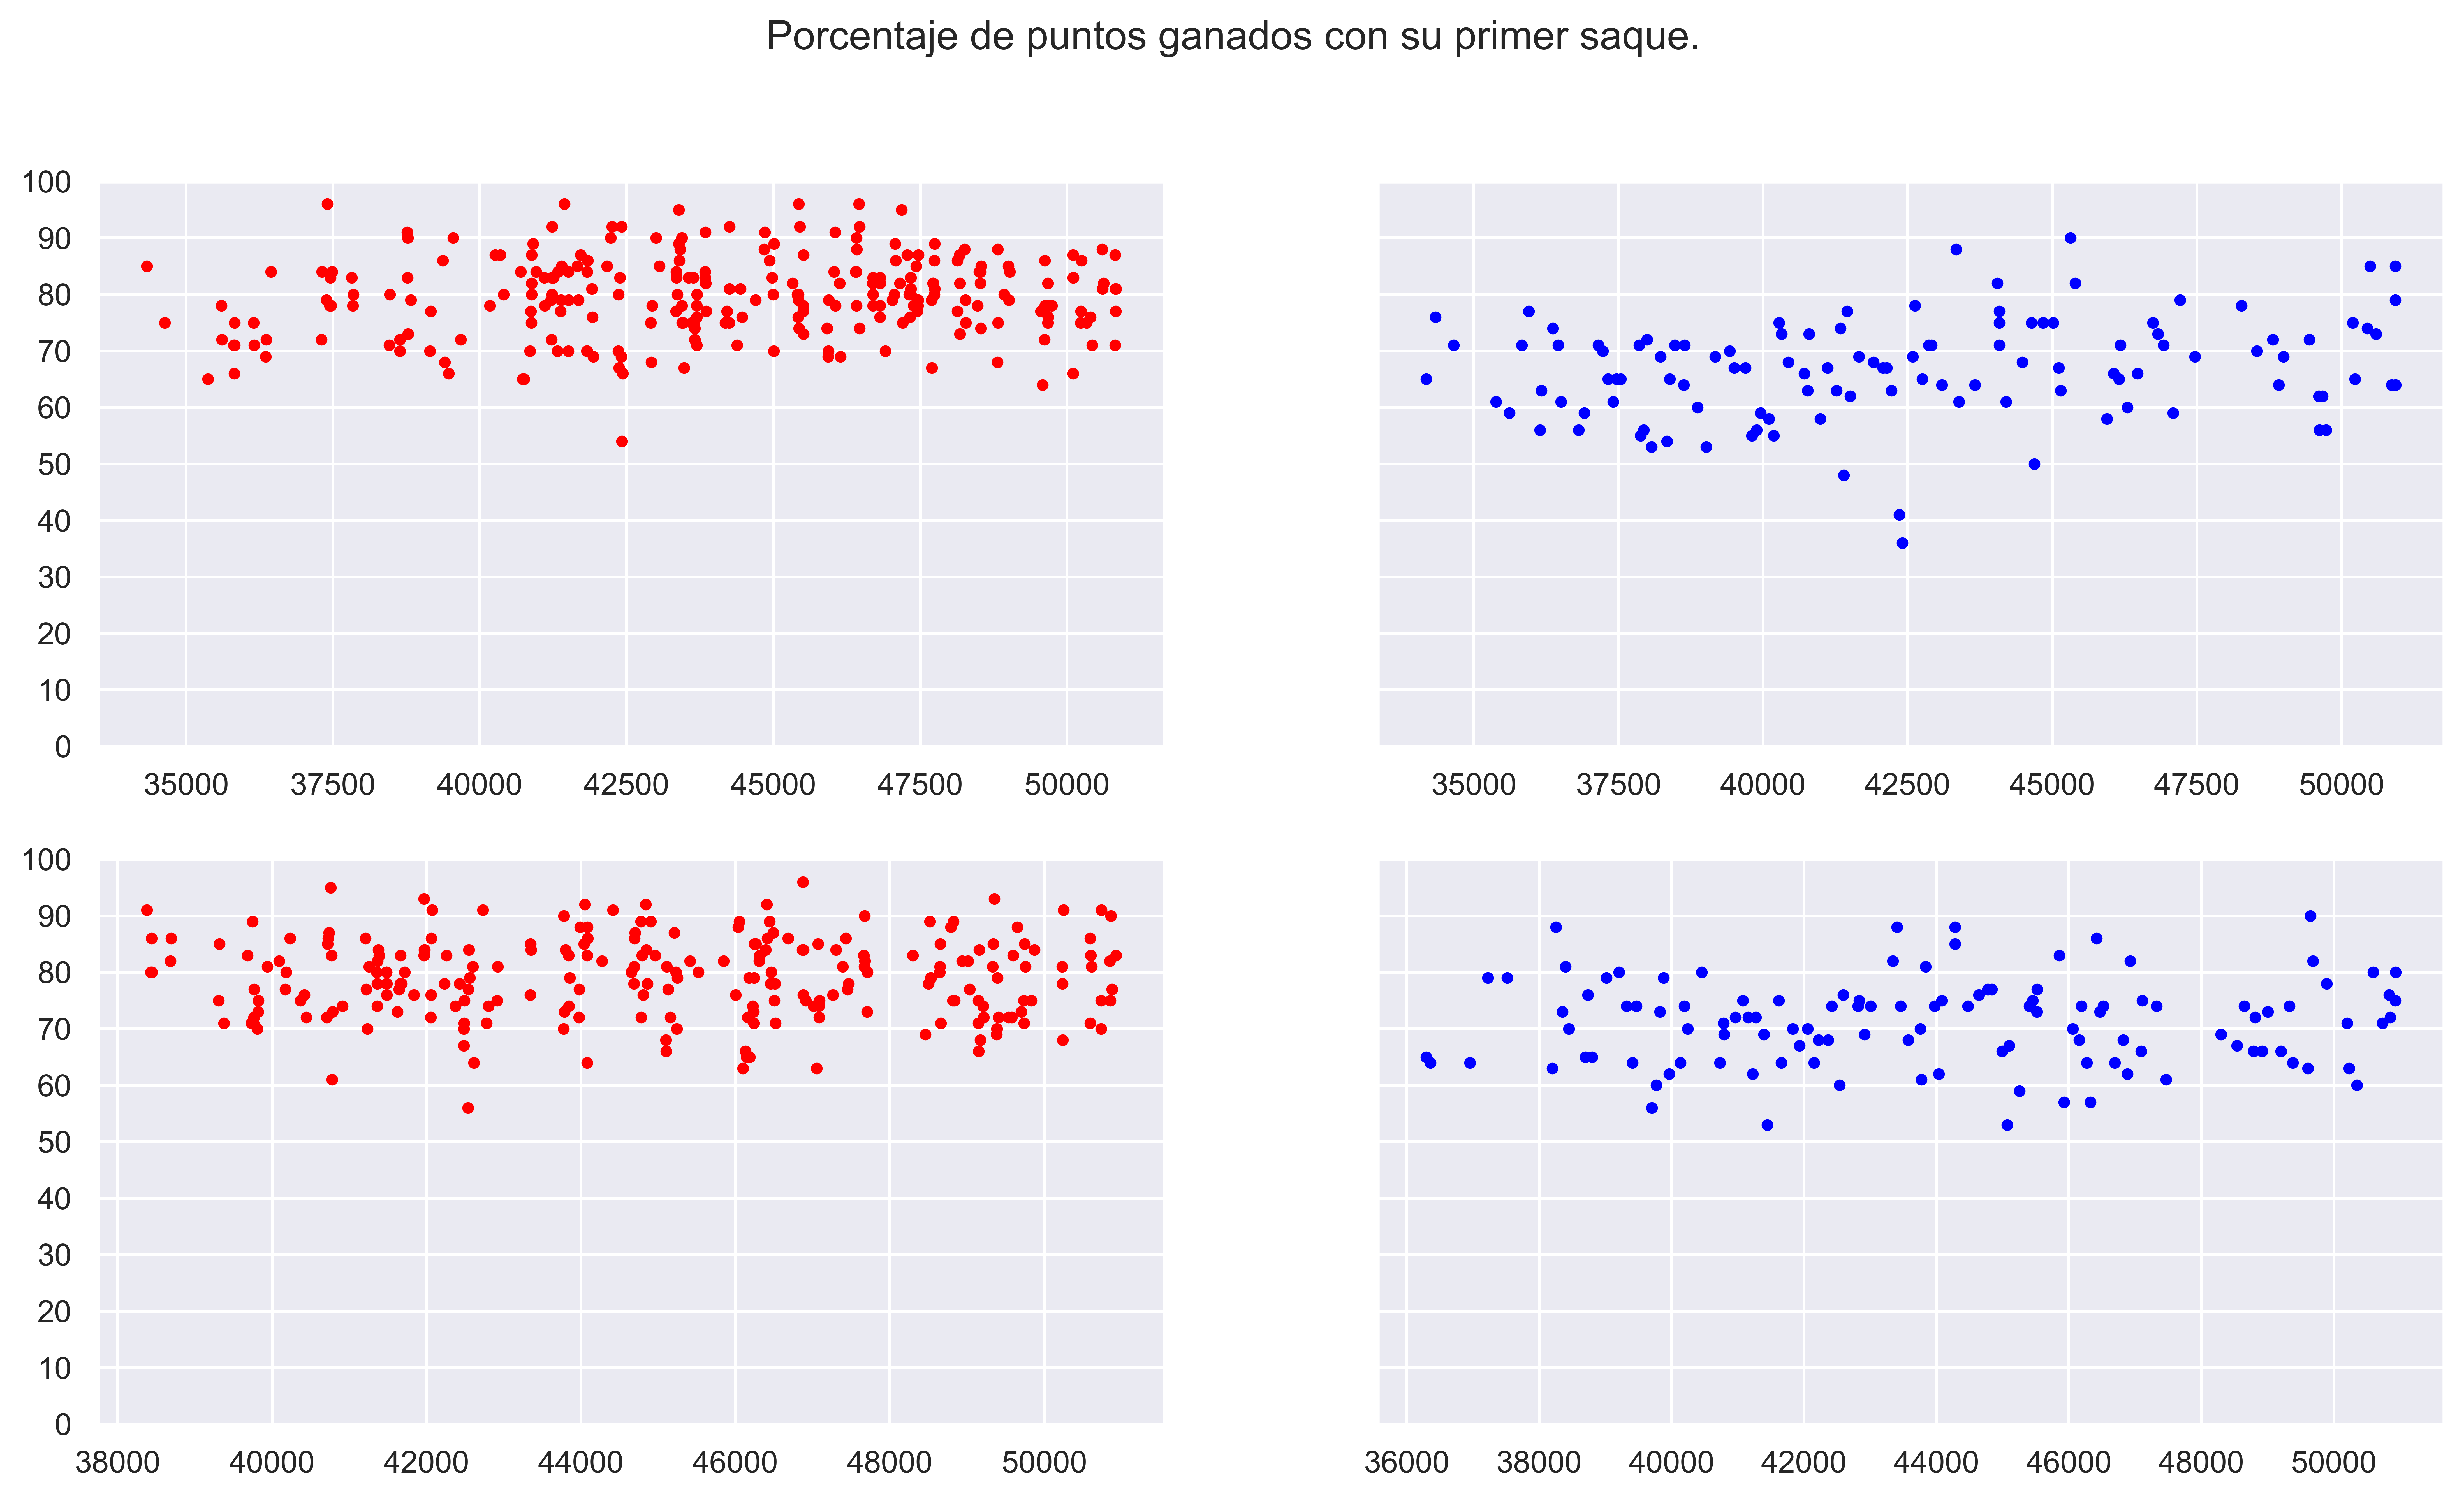

In [46]:
fig, ax = plt.subplots(2,2,sharex=False, sharey=True, dpi=720, figsize=(15, 8))

y1 = df_1_winner['w_1servewon_per']
x1 = df_1_winner.index

y2 = df_1_loser['l_1servewon_per']
x2 = df_1_loser.index

y3 = df_2_winner['w_1servewon_per']
x3 = df_2_winner.index

y4 = df_2_loser['l_1servewon_per']
x4 = df_2_loser.index

ax[0,0].scatter(x1, y1, color='red', s=10)
ax[0,1].scatter(x2, y2, color='blue', s=10)
ax[1,0].scatter(x3, y3, color='red', s=10)
ax[1,1].scatter(x4, y4, color='blue', s=10)

fig.suptitle('Porcentaje de puntos ganados con su primer saque.')

lista_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.yticks(lista_ticks)
plt.show()


# Superficies. 

#### Los jugadores suelen tener afinidad en las superficies donde juegan. Hay jugadores donde se destacan mas en una superficie que otra. Es determinante en su estilo de juego y a la hora de determinar el ganador de un enfrentamiento.

#### Determinamos en que superficies, el jugador consigue el mayor porcentaje de victorias ha conseguido.

#### Se decarta la superfice carpeta/carpet ya que, desde el ano 2009, no se juega mas en dicha superficie.

surface
Clay     43
Grass    66
Hard     73
Name: count, dtype: int32
surface
Clay     75
Grass    59
Hard     64
Name: count, dtype: int32


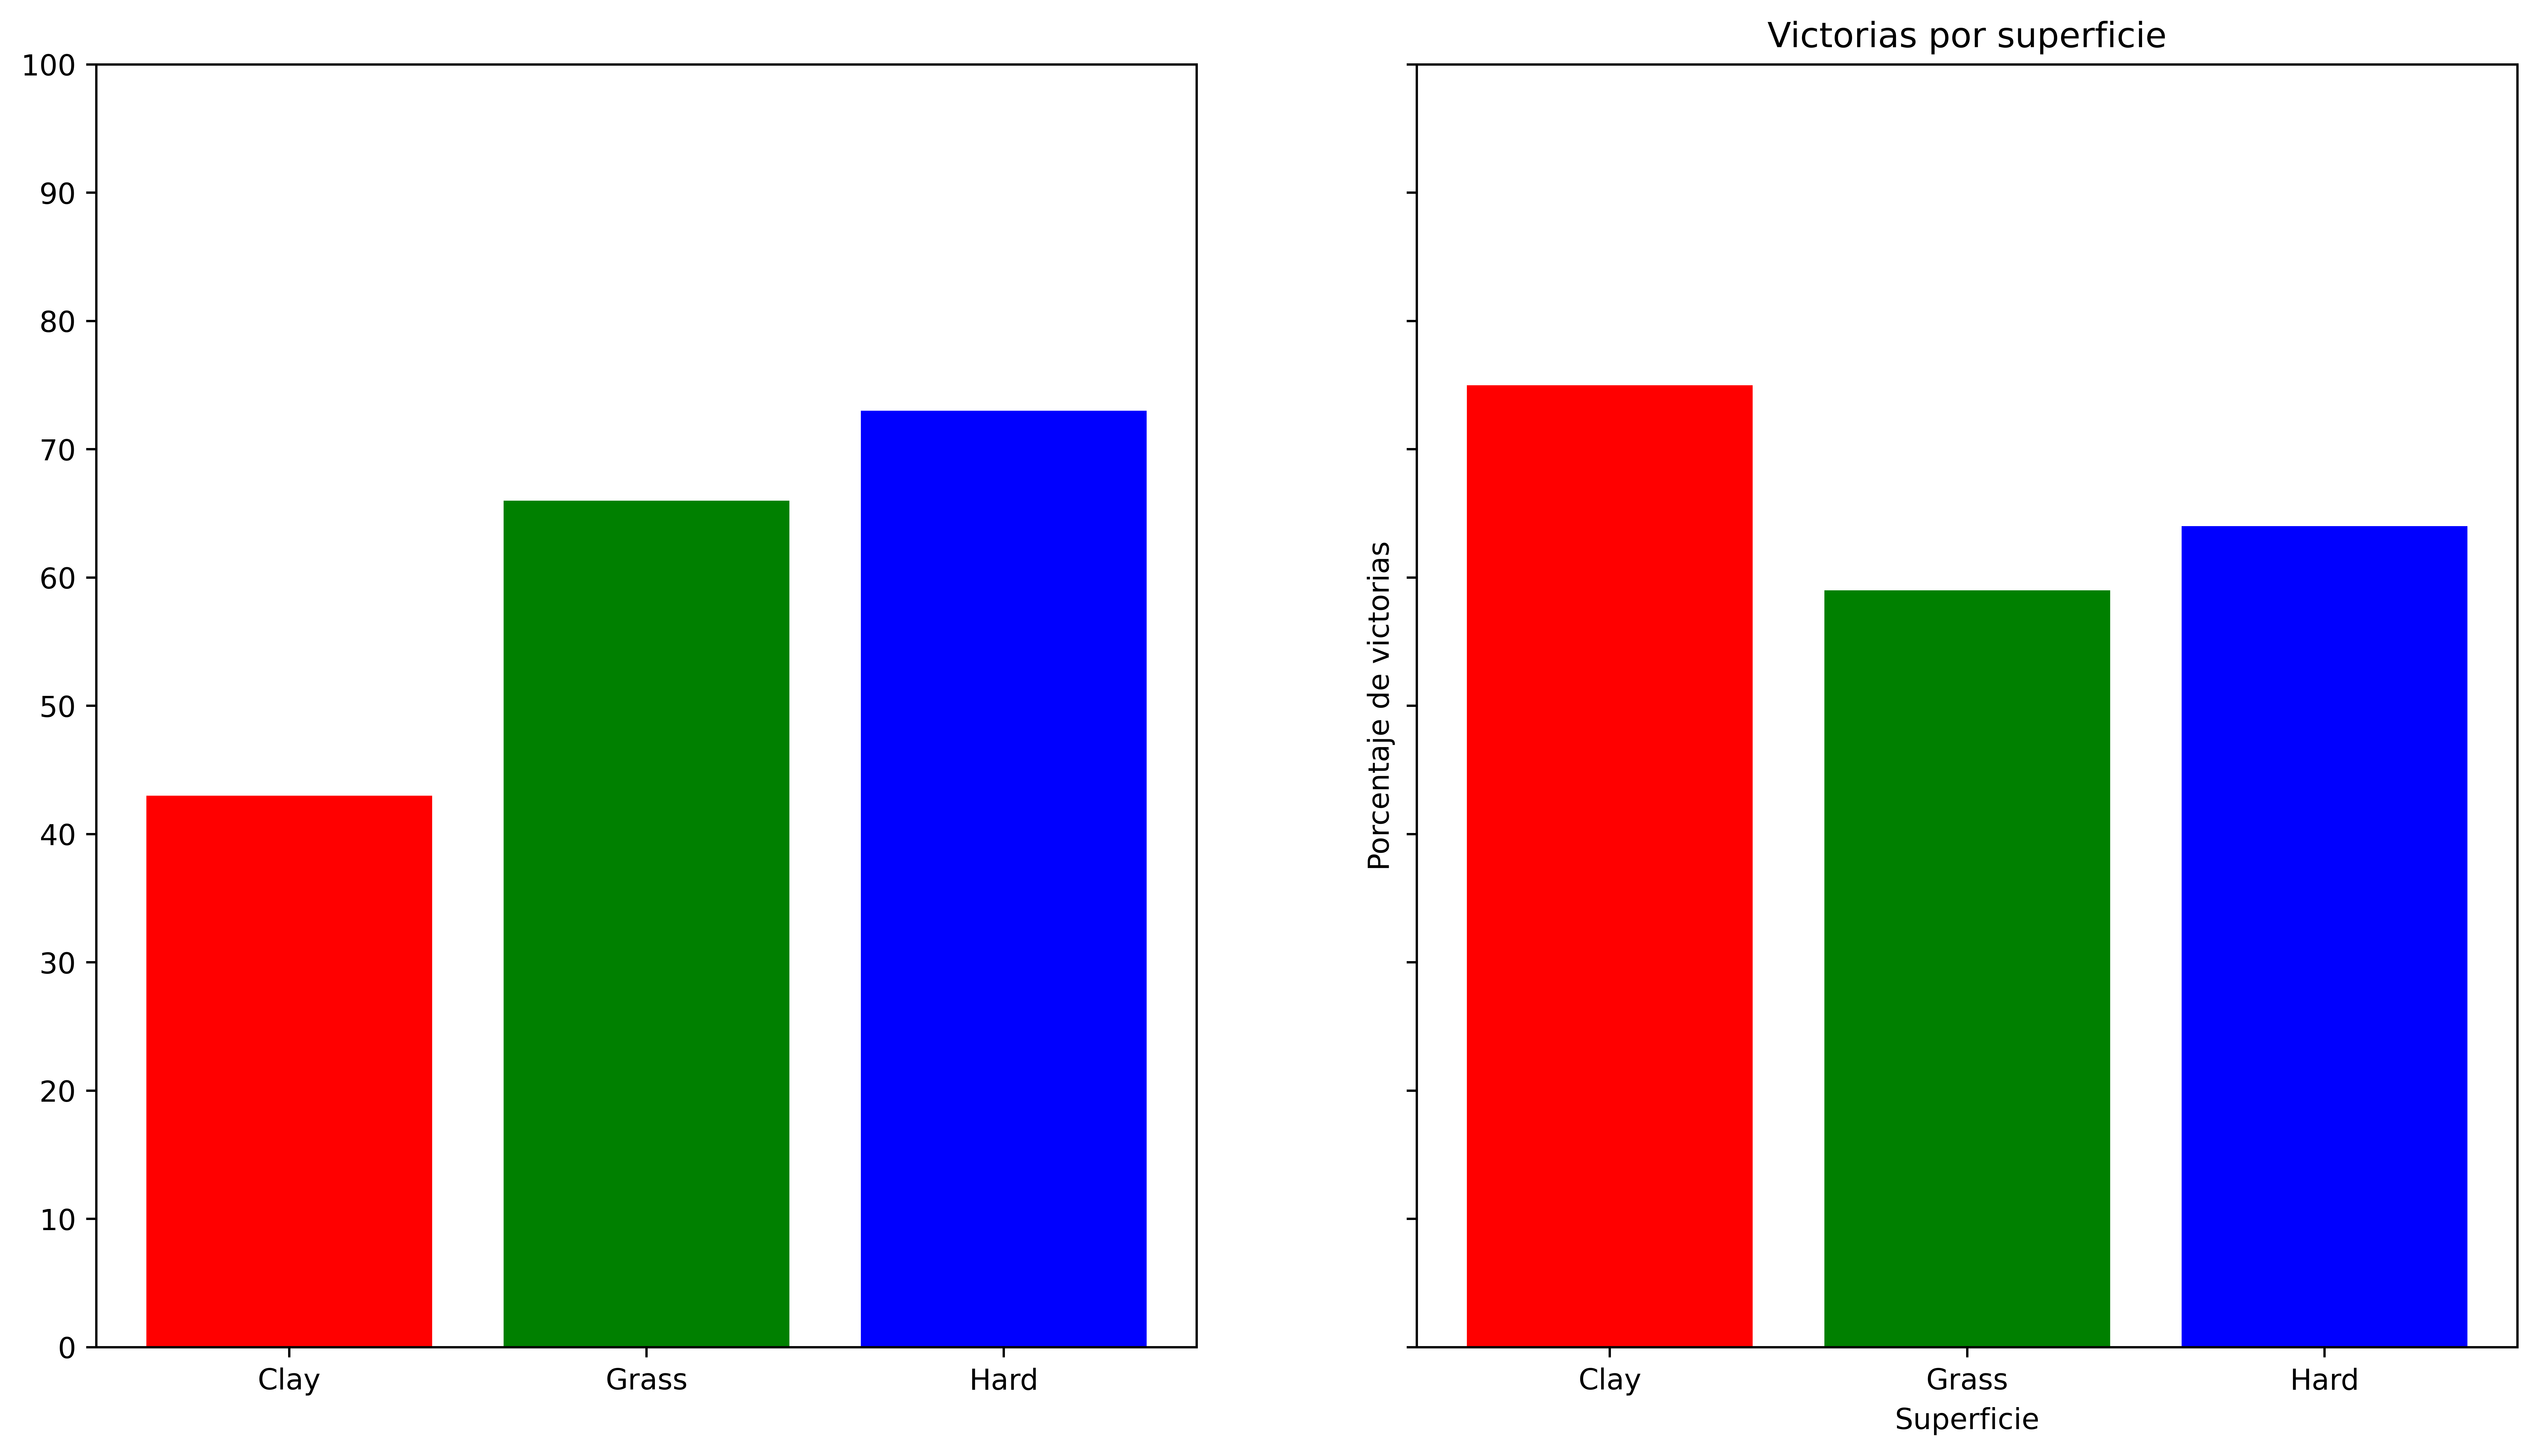

In [29]:
counts_vic_1 = df_1_winner['surface'].value_counts()
counts_der_1 = df_1_loser['surface'].value_counts()
counts_vic_2 = df_2_winner['surface'].value_counts()
counts_der_2 = df_2_loser['surface'].value_counts()

dict_colors = {'Clay': 'r', 'Grass':'g', 'Hard':'b'}
suma_count_1 = counts_vic_1 + counts_der_1
suma_count_2 = counts_vic_2 + counts_der_2
por_victories_sup_1 = (((counts_vic_1/suma_count_1)*100).astype(int))
por_victories_sup_2 = (((counts_vic_2/suma_count_2)*100).astype(int))
print(por_victories_sup_1.sort_index())
print(por_victories_sup_2.sort_index())

lista_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig, ax = plt.subplots(1,2,sharex=False, sharey=True, dpi=720, figsize=(15, 8))
ax[0].bar(height=por_victories_sup_1.sort_index(), x=list(dict_colors.keys()), color=dict_colors.values())
ax[1].bar(height=por_victories_sup_2.sort_index(), x=list(dict_colors.keys()), color=dict_colors.values())

plt.xlabel('Superficie')
plt.ylabel('Porcentaje de victorias')
plt.title('Victorias por superficie')
plt.yticks(lista_ticks)
plt.show()

# Aces y doble faltas.

#### Otra variable a tener en cuenta es la cantidad de aces. En algunos jugadores, es algo determinante ya que pueden basan su juego en concretar la mayor cantidad de aces. 

#### Se mira cuál es la cantidad de aces que realiza durante sus victorias.

<Axes: xlabel='l_ace', ylabel='Count'>

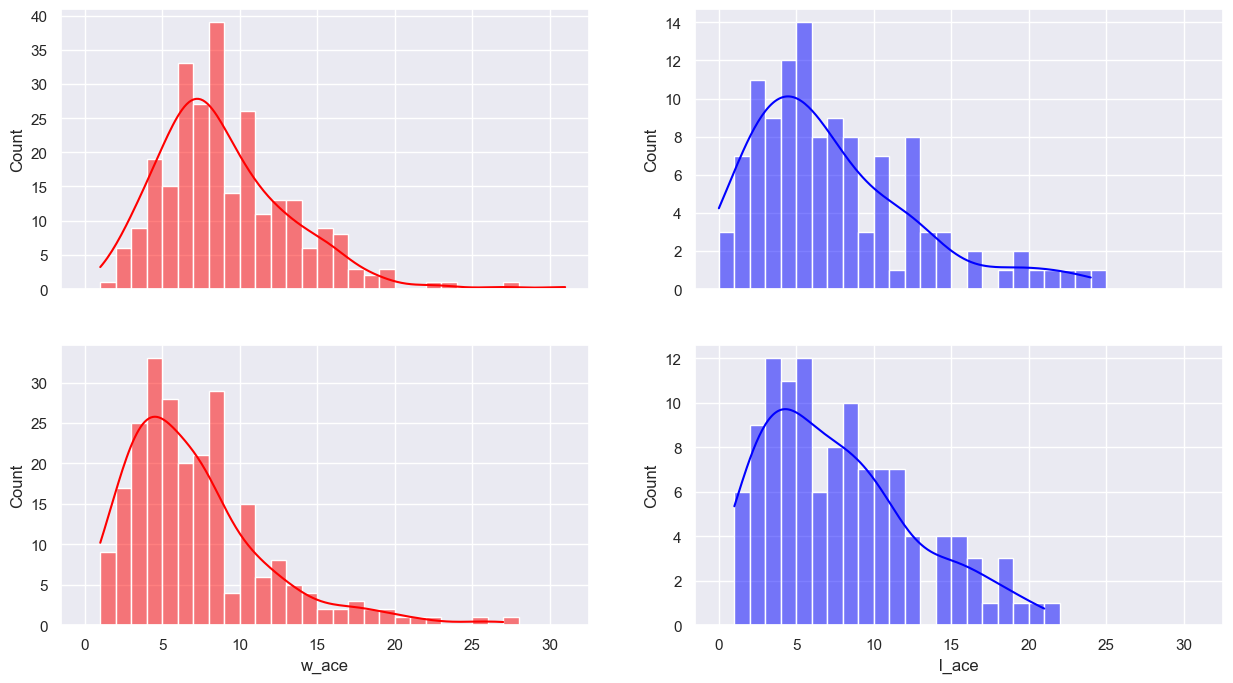

In [30]:
sns.set()
fig, axes = plt.subplots(2, 2, sharex=True,figsize=(15, 8))
sns.histplot(data=df_1_winner, x="w_ace", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[0,0])
sns.histplot(data=df_1_loser, x="l_ace", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[0,1])
sns.histplot(data=df_2_winner, x="w_ace", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[1,0])
sns.histplot(data=df_2_loser, x="l_ace", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[1,1])

#### Conjunto a los aces, se toman en cuenta la cantidad de dobles faltas que realizan. Estos son puntos que el jugador cede a su rival cuando su saque falla dos veces seguidas. Cuanto más doble faltas haga un jugador, más puntos cede a sus rivales. 

#### Se mira cuál es la cantidad de aces que realiza durante sus victorias y derrotas.

<Axes: xlabel='l_df', ylabel='Count'>

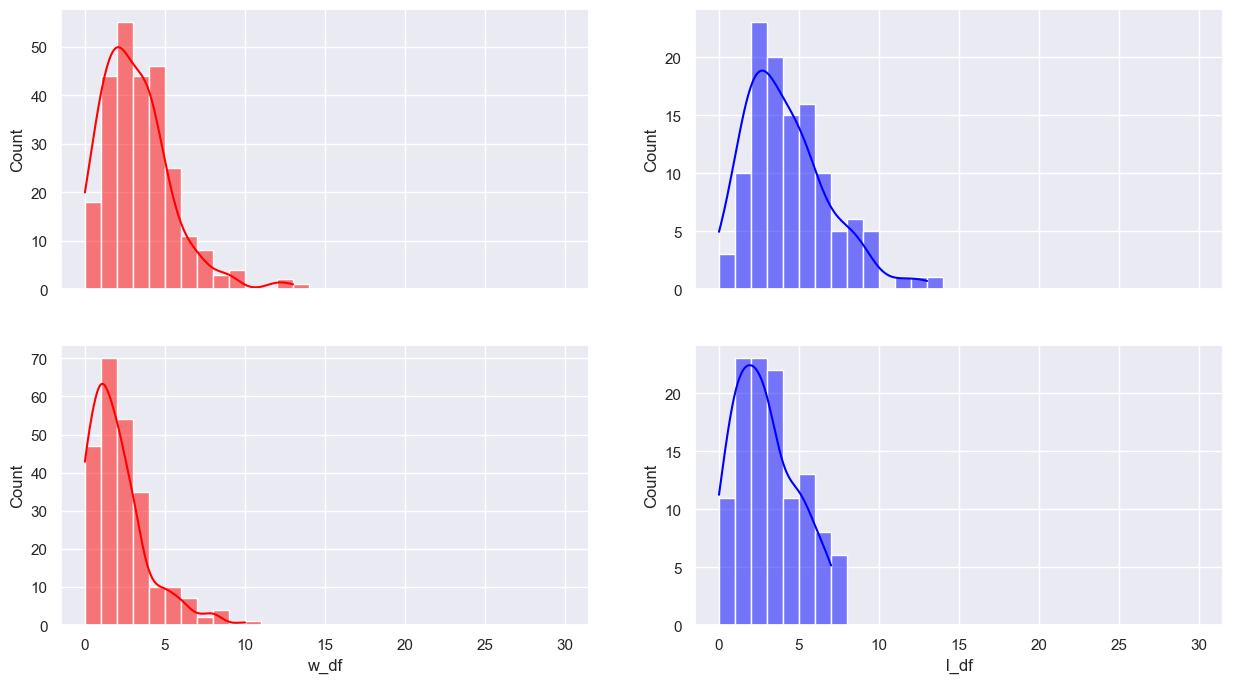

In [31]:
sns.set()
fig, axes = plt.subplots(2, 2, sharex=True,figsize=(15, 8))
sns.histplot(data=df_1_winner, x="w_df", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[0,0])
sns.histplot(data=df_1_loser, x="l_df", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[0,1])
sns.histplot(data=df_2_winner, x="w_df", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[1,0])
sns.histplot(data=df_2_loser, x="l_df", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[1,1])

# Break points. 

#### Break points son aquellos puntos que "rompen" el flujo normal del jugo, ganándose contra el saque del rival. Esto es un indicador de un jugador que juega muy bien cuando recibe el saque de rival y es capaz de ganarle games sin su saque. 

#### Para determinar la cantidad de break points hechos, se toman en cuenta los puntos que el rival enfrento y se resta los que salvó. La diferencia son los puntos que cedió a su oponente. 

In [44]:
df_1_winner['break_points_made'] = (df_1_winner['l_bpFaced']-df_1_winner['l_bpSaved']).astype(int)
df_1_winner['break_points_recieved'] = (df_1_winner['w_bpFaced']-df_1_winner['w_bpSaved']).astype(int)
df_1_loser['break_points_made'] = (df_1_loser['w_bpFaced']-df_1_loser['w_bpSaved']).astype(int)
df_1_loser['break_points_recieved'] = (df_1_loser['l_bpFaced']-df_1_loser['l_bpSaved']).astype(int)
df_2_winner['break_points_made'] = (df_2_winner['l_bpFaced']-df_2_winner['l_bpSaved']).astype(int)
df_2_winner['break_points_recieved'] = (df_2_winner['w_bpFaced']-df_2_winner['w_bpSaved']).astype(int)
df_2_loser['break_points_made'] = (df_2_loser['w_bpFaced']-df_2_loser['w_bpSaved']).astype(int)
df_2_loser['break_points_recieved'] = (df_2_loser['l_bpFaced']-df_2_loser['l_bpSaved']).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\3159315062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_winner['break_points_made'] = (df_1_winner['l_bpFaced']-df_1_winner['l_bpSaved']).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\3159315062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_winner['break_points_recieved'] = (df_1_winner['w_bpFaced']-df_1_winner['w_bpSaved']).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3648\3159315062.py:3: SettingWithCop

In [45]:
df_2_loser.sample(10)

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target,w_1servewon_per,l_1servewon_per,break_points_made,break_points_recieved
47467,Hard,Daniil Medvedev,Stefanos Tsitsipas,6-4 6-2 7-5,5,SF,17,2,82,56,49,12,15,2,3,3,3,101,70,43,13,15,4,9,0,87,61,1,5
40245,Grass,Denis Kudla,Stefanos Tsitsipas,6-3 6-4,3,R16,5,3,66,34,27,20,10,4,4,4,3,62,34,24,13,9,1,3,0,79,70,0,2
50852,Hard,Novak Djokovic,Stefanos Tsitsipas,6-2 3-6 7-6(4),3,SF,11,0,78,49,41,21,15,0,2,9,1,89,61,44,14,14,4,6,0,83,72,2,2
44282,Hard,Nick Kyrgios,Stefanos Tsitsipas,7-6(7) 6-7(3) 7-6(5),3,RR,25,3,113,83,67,20,18,2,2,18,2,123,85,75,15,18,1,1,0,80,88,0,0
38736,Hard,Lukas Lacko,Stefanos Tsitsipas,6-3 6-7(5) 6-3,3,R32,12,3,100,59,50,18,16,2,3,12,1,82,52,40,14,14,0,3,0,84,76,1,3
41656,Hard,Rafael Nadal,Stefanos Tsitsipas,6-2 6-4 6-0,5,SF,5,0,61,40,34,15,12,1,1,5,2,65,45,29,6,12,5,11,0,85,64,0,6
42814,Clay,Stan Wawrinka,Stefanos Tsitsipas,7-6(6) 5-7 6-4 3-6 8-6,5,R16,16,3,206,128,91,40,29,22,27,3,6,183,124,92,28,28,9,14,0,71,74,5,5
44836,Hard,Milos Raonic,Stefanos Tsitsipas,7-6(5) 6-3,3,SF,12,5,65,39,35,15,11,1,1,4,1,61,36,28,16,10,0,1,0,89,77,0,1
38397,Hard,John Isner,Stefanos Tsitsipas,7-6(2) 7-6(9),3,R32,14,2,100,72,54,16,12,5,5,16,1,77,49,40,18,12,0,0,0,75,81,0,0
42417,Clay,Jan Lennard Struff,Stefanos Tsitsipas,6-4 3-6 6-2,3,R16,7,1,73,35,27,23,13,4,6,10,4,94,59,44,12,14,6,10,0,77,74,2,4


<Axes: xlabel='break_points_recieved', ylabel='Count'>

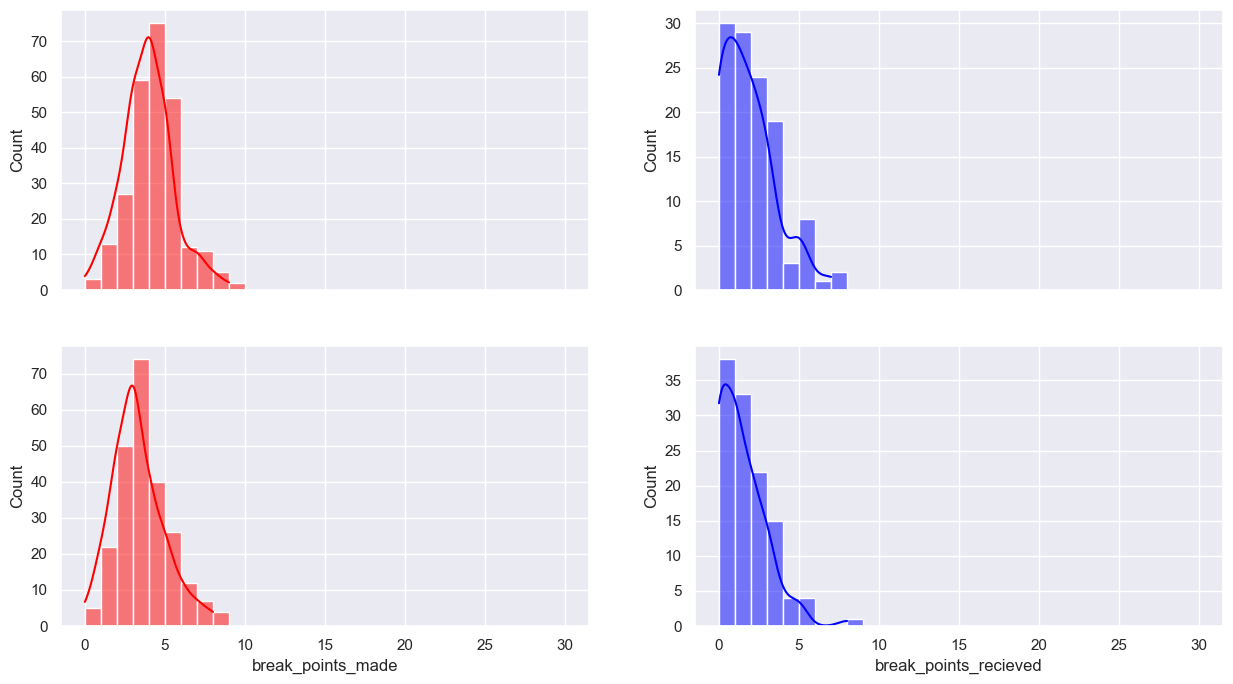

In [34]:
sns.set()
fig, axes = plt.subplots(2, 2, sharex=True,figsize=(15, 8))
sns.histplot(data=df_1_winner, x="break_points_made", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[0,0])
sns.histplot(data=df_1_loser, x="break_points_recieved", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[0,1])
sns.histplot(data=df_2_winner, x="break_points_made", bins=30, kde=True, binrange=[0,30], color='red', ax=axes[1,0])
sns.histplot(data=df_2_loser, x="break_points_recieved", bins=30, kde=True, binrange=[0,30], color='blue',ax=axes[1,1])

### Insights:

#### - El describe nos da las medidas de los valores de w_ y l_.

#### - El porcentaje de los primeros saques es alto y mas concentrado en las victorias. Mientras que en las derrotas, es mas bajo y mas disperso. Es determinante para saber sí ganó o no.

#### - El porcentaje de victorias sobre las superficies, indica en que superficie tiene más chances de ganar un partido. En este caso, los jugadores tienen distintos winrate en las superficies donde juegan. Afecta en su rendimiento.

#### - Los aces depende mucho del jugador y de su estilo. En algunos casos, es irrelevante. En este caso, hay una ligera diferencia en los puntos marcados por el histograma que no tiene tanto peso en el resultado como otros prámetros. Sin embargo, influyen en su medida.

#### - Los break points son cruciales ya que dan vuelta el resultado. Es importante anotar tantos como es posible. En este caso, hace varios por partidos. Son suficientes como para garantizarse un set.

### Modelo.

#### Para este caso sólo usaremos los datos de Daniil Medvedev. 

#### Obtenemos los resultados de sus partidos juntando las derrotas y victorias.

In [35]:
df_1 = pd.concat([df_1_winner, df_1_loser], ignore_index=False)

In [36]:
df_1

,surface,winner_name,loser_name,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target,w_1servewon_per,l_1servewon_per,break_points_made,break_points_recieved
34330,Grass,Daniil Medvedev,Horacio Zeballos,6-3 6-1,3,R32,10,2,52,28,24,12,8,1,2,2,2,52,30,18,6,8,4,9,1,85,60,5,1
34637,Clay,Daniil Medvedev,Jan Lennard Struff,6-4 5-7 6-4,3,R32,4,1,93,49,37,30,16,0,1,1,5,94,47,37,25,16,0,2,1,75,78,2,1
35372,Hard,Daniil Medvedev,Alexander Bublik,6-4 6-0,3,R32,3,2,58,38,25,9,8,3,5,2,2,46,26,15,3,8,4,10,1,65,57,6,2
35602,Hard,Daniil Medvedev,Mikhail Kukushkin,6-4 4-0 RET,3,R32,8,1,42,32,25,3,7,2,3,0,2,48,19,9,13,7,6,10,1,78,47,4,1
35611,Hard,Daniil Medvedev,Viktor Troicki,3-6 6-3 6-1,3,R16,3,4,82,50,36,14,12,7,9,7,0,85,55,33,17,13,9,14,1,72,60,5,2
35811,Hard,Daniil Medvedev,Thiago Monteiro,6-3 6-3,3,R32,8,4,72,46,33,12,9,3,4,2,3,67,43,25,11,9,6,10,1,71,58,4,1
35819,Hard,Daniil Medvedev,Yen Hsun Lu,6-4 6-3,3,R16,6,1,69,36,24,18,9,3,5,2,3,57,28,14,15,10,4,9,1,66,50,5,2
35824,Hard,Daniil Medvedev,Jozef Kovalik,6-1 6-4,3,QF,8,2,55,37,28,7,8,3,4,3,5,69,45,26,9,9,6,11,1,75,57,5,1
35826,Hard,Daniil Medvedev,Dudi Sela,4-6 7-6(2) 6-2,3,SF,4,2,96,59,42,21,15,6,9,3,2,92,65,40,17,15,3,7,1,71,61,4,3
36150,Hard,Daniil Medvedev,Tobias Kamke,6-2 7-6(3),3,R32,8,1,64,37,28,16,10,3,4,0,3,68,45,31,10,10,5,8,1,75,68,3,1


#### Eliminamos las columnas irrelevantes para el análisis (featured selection)

In [37]:
df_1 = df_1.drop(['surface','winner_name','loser_name','score','best_of','round'], axis=1)

In [42]:
df_1.sample(25)

,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,target,w_1servewon_per,l_1servewon_per,break_points_made,break_points_recieved
43612,16,6,115,62,47,26,21,8,14,0,0,142,110,61,15,21,17,26,1,75,55,9,6
45420,4,4,51,26,20,17,8,5,5,2,1,58,41,24,4,8,6,10,1,76,58,4,0
42911,1,4,110,73,53,18,16,6,8,13,3,94,56,40,18,15,4,8,0,72,71,4,2
38472,5,2,86,45,34,22,13,7,9,7,3,71,38,27,15,13,1,5,0,75,71,4,2
37449,9,0,72,42,33,15,11,2,3,11,5,72,43,33,9,10,8,11,1,78,76,3,1
44936,4,4,66,43,37,16,13,2,2,1,3,84,54,32,13,12,4,9,1,86,59,5,0
37858,7,2,47,30,25,12,9,2,2,2,5,51,32,23,7,9,2,5,0,83,71,3,0
49618,4,4,66,40,29,12,12,1,4,0,3,90,56,34,14,12,5,10,1,72,60,5,3
43449,9,2,54,37,28,9,8,3,3,2,1,53,28,18,7,7,5,9,1,75,64,4,0
45399,9,0,62,41,34,14,11,1,1,10,4,72,39,32,17,11,6,7,0,82,82,1,0


#### Guardamos los resultados en un nuevo dataframe. 

In [39]:
df_1.to_csv('atp_matches_dm.csv')

#### Debido a que los resultados de los partidos pueden ser solo victoria o derrota (categorías), uso una regresión logística para determinar el resultado en base a los números del encuentro.

In [40]:

X = df_1.drop(["target"], axis=1)  
y = df_1["target"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.8157894736842105


c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Usamos una matriz de confusión para ver los resultados de las predicciones y los datos verdaderos.

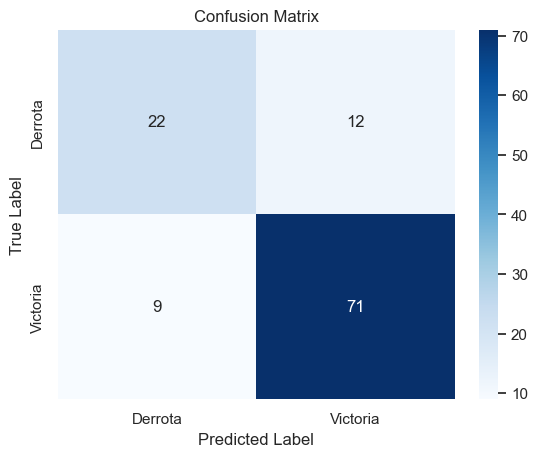

In [41]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=["Derrota", "Victoria"], columns=["Derrota", "Victoria"])

fig, ax = plt.subplots()

sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")
plt.show()

#### Conclusiones.

#### Para un sólo jugador,  el modelo tiene una eficacia del 81%, es decir, 4 de cada 5 resultados son correctos.

#### Posiblemente mejore con el hecho de clasificar según la superficie antes de hacer las predicciones. Se verá en otra parte.